In [1]:
import numpy as np
import xarray as xr

# Hands-on xarray

Please follow the [official xarray instruction on installation](https://docs.xarray.dev/en/stable/getting-started-guide/installing.html#:~:text=The%20easiest%20way%20to%20get%20everything%20installed%20is%20to%20use%20conda.) to install xarray in case of missing dependency packages.

In [2]:
# using xarray to open an NetCDF4 dataset as a Dataset
wrf0 = xr.open_dataset("2020/wrfout_d01_2019-12-31_00:00:00")  # file name may be changed in Windows as : is not supported in the file name

In [3]:
wrf0
#wrf0.data_vars # we could also get the variable list in the Dataset

<xarray.Dataset>
Dimensions:                (Time: 8, south_north: 120, west_east: 160,
                            bottom_top: 44, bottom_top_stag: 45,
                            soil_layers_stag: 4, west_east_stag: 161,
                            south_north_stag: 121, pft_fraction_stag: 17,
                            seed_dim_stag: 2)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                pft_fraction_stag, seed_dim_stag
Data variables: (12/194)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/131)
    TITLE:                            OUTPUT FROM WRF V4.3 MODEL
    START_DATE:                      2019-12-01_00:00:00
    SIMULATION_START_DATE:           2019-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        161
    SOUTH-NORTH_GRID_DIMENSION:      121
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [4]:
# get a specific variable using its name (DataArray)
wrf0.RAINNC  # accumulated grid scale precipitation

<xarray.DataArray 'RAINNC' (Time: 8, south_north: 120, west_east: 160)>
[153600 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] 2019-12-31 ... 2019-12-31T21:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL GRID SCALE PRECIPITATION
    units:        mm
    stagger:

Outputs of xarray could quickly tell us the shape, specifc coordinates, and attributes (metadata) of the variable of interest. Here, we know that RAINNC (accumulated total grid scale precipitation) in this file has the dimension of 8 time steps, 120 latitude points, and 160 longitude points. By clicking the stack logo aside `XTIME` in `Coordinates`, we could know that the 8 time steps are from 2019-12-31 00:00 to 2019-12-31 21:00 with an increment of 3hrs.

As you may observe that Dimension names (e.g., `Time`, `south_north`) are different to the Coordinate names (e.g., `XTIME`, `XLONG`) in WRF outputs, they do not follow the metadata conventions that `xarray` relies on to link data dimensions with coordinates. Thus, we need to comprehend the dimension info on our selves instead of directly relying on xarray.

In [5]:
# access values in specific time as NumPy
wrf0.RAINNC[0, :, :].to_numpy()  # select first point in the temporal dimension (i.e. snapshot of one time step)
# wrf0.RAINC.sel(Time="2019-12-31 00:00:00").to_numpy()  # although this interpretable selection method is common in xarray, it is not applicable for WRF outputs.

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.6060135e+01, 8.0075653e+01, ..., 2.1402066e+02,
        1.2533081e+02, 0.0000000e+00],
       [0.0000000e+00, 5.7169472e+01, 7.2764244e+01, ..., 2.6541202e+02,
        1.7464635e+02, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.1373848e+00, 2.4167149e+00, ..., 7.1447366e-03,
        1.2406007e-03, 0.0000000e+00],
       [0.0000000e+00, 4.7040319e-01, 1.0151448e+00, ..., 2.0610780e-06,
        2.9500793e-06, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

# Understanding WRF rainfall outputs

Our WRF outputs are extremely raw right now, so it is good to have a basic comprehension regard WRF outputs so that we can extract proper data we want.

There are three variables in WRF outputs related to precipitation, 
+ RAINC: accumulated total cumulus precipitation
+ <u>**RAINNC: accumulated grid scale precipitation**</u>
+ RAINSH: accumulated shallow cumulus precipitation

We need to note only RAINNC is needed, as we have a relatively fine spatial resolution (far << 5km). In this case, our spatial resolution is enough for convective rainfall and we do not need some general schemes to assume convective rainfall within the grid, so there is no RAINC and RAINSH.

In [6]:
wrf0 = xr.open_dataset("2020/wrfout_d01_2020-01-01_00:00:00")
wrf0.RAINNC[0, :, :].to_numpy()  # precipitation upto 2020-01-01_00:00:00

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.6060135e+01, 8.0075653e+01, ..., 2.1402066e+02,
        1.2533081e+02, 0.0000000e+00],
       [0.0000000e+00, 5.7169472e+01, 7.2764244e+01, ..., 2.6541202e+02,
        1.7464635e+02, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.1373848e+00, 2.4167149e+00, ..., 7.1447366e-03,
        1.2406007e-03, 0.0000000e+00],
       [0.0000000e+00, 4.7040319e-01, 1.0151448e+00, ..., 2.0610780e-06,
        2.9500793e-06, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

Also, one very important feature of WRF outputs is that **rainfall is accumulated throughout the running period**. If we wish to get the precipitation of a specific duration (say a day or a month), we just need to the subtract the WRF outputs of the ending time point with that of the starting time point. Our WRF outputs are runned year by year, so we just need to treat each year individually.

In [7]:
wrf1 = xr.open_dataset("2020/wrfout_d01_2020-01-02_00:00:00")  
print(wrf1.RAINNC[0, :, :].to_numpy())  # 24hrs after 2020-01-01_00:00:00
p1d = wrf1.RAINNC[0, :, :].to_numpy() - wrf0.RAINNC[0, :, :].to_numpy()  # total precipitation of 1 day
print(p1d)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.6060135e+01 8.0075653e+01 ... 2.1402066e+02
  1.2533081e+02 0.0000000e+00]
 [0.0000000e+00 5.7169472e+01 7.2764244e+01 ... 2.6541202e+02
  1.7464635e+02 0.0000000e+00]
 ...
 [0.0000000e+00 1.1373848e+00 2.4167149e+00 ... 7.1447366e-03
  1.2406007e-03 0.0000000e+00]
 [0.0000000e+00 4.7040319e-01 1.0151448e+00 ... 2.0610780e-06
  2.9500793e-06 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
wrf2 = xr.open_dataset("2020/wrfout_d01_2020-02-01_00:00:00")  
print(wrf2.RAINNC[0, :, :].to_numpy())  # 1 month after 2020-01-01_00:00:00
p1m = wrf2.RAINNC[0, :, :].to_numpy() - wrf0.RAINNC[0, :, :].to_numpy()  # total precipitation of 1 month
print(p1m)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.42586899e+01 1.27169075e+02 ... 2.27448685e+02
  1.30239975e+02 0.00000000e+00]
 [0.00000000e+00 8.63641739e+01 1.36211578e+02 ... 2.82752136e+02
  1.80754807e+02 0.00000000e+00]
 ...
 [0.00000000e+00 1.42882574e+00 2.72529054e+00 ... 1.74072206e-01
  9.15360730e-03 0.00000000e+00]
 [0.00000000e+00 7.29825318e-01 1.33259153e+00 ... 2.53591668e-02
  5.52828806e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.8198555e+01 4.7093422e+01 ... 1.3428024e+01
  4.9091644e+00 0.0000000e+00]
 [0.0000000e+00 2.9194702e+01 6.3447334e+01 ... 1.7340118e+01
  6.1084595e+00 0.0000000e+00]
 ...
 [0.0000000e+00 2.9144096e-01 3.0857563e-01 ... 1.6692747e-01
  7.9130065e-03 0.0000000e+00]
 [0.0000000e+00 2.59422

One special thing is that our WRF underwent several restarts during running (even it is within one-year run), so we will see after some time points, the output file time stamps change to 03:00:00 instead of 00:00:00. In this case, we just need to find out the right file that contains the right time stamp that we need (all the files still contain 8 steps $\times$ 3hrs data). Let's say we wish to take 2020 March monthly precipitation.

In [9]:
wrf2020mar = xr.open_dataset("2020/wrfout_d01_2020-03-01_00:00:00")  
wrf2020mar.RAINNC.XTIME[0]

<xarray.DataArray 'XTIME' ()>
array('2020-03-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    XTIME    datetime64[ns] ...
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2019-12-01 00:00:00
    stagger:

In [10]:
wrf2020apr = xr.open_dataset("2020/wrfout_d01_2020-03-31_03:00:00")  # This is a file starting from 3:00:00
wrf2020apr.RAINNC.XTIME[7] # note we take a different index so that we could have 1 month after 2020-03-01T00:00:00 (i.e. 2020-04-01T00:00:00)

<xarray.DataArray 'XTIME' ()>
array('2020-04-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    XTIME    datetime64[ns] ...
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2019-12-01 00:00:00
    stagger:

Based on the above, we find out the correct time stamps that we need to calculate the 2020 March precipitation (i.e. `2020-03-01T00:00:00` and `2020-04-01T00:00:00`). We could get this month's precipitation by directly taking the subtraction.

In [11]:
p1m = wrf2020apr.RAINNC[7, :, :] - wrf2020mar.RAINNC[0, :, :]
p1m

<xarray.DataArray 'RAINNC' (south_north: 120, west_east: 160)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.9775391e-02, 1.7105103e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.9321899e-02, 3.7780762e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.2562973e+01, 8.3561335e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.1447567e+01, 1.3418192e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 1.107 1.107 1.107 ... 1.652 1.652
    XLONG    (south_north, west_east) float32 103.5 103.5 103.5 ... 104.2 104.2
Dimensions without coordinates: south_north, west_east

With the help of xarray, we could easily plot out the values to have a look.

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # for plotting map

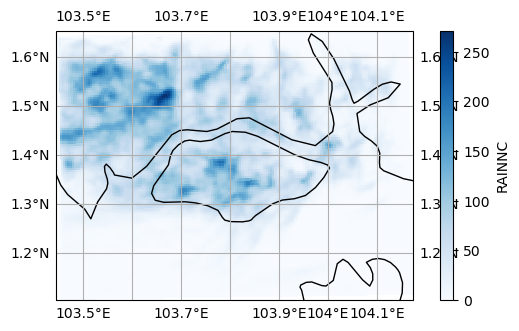

In [13]:
fig = plt.figure(figsize=(7, 3.5))
p = p1m.plot(x="XLONG", y="XLAT", 
             subplot_kws={"projection": ccrs.PlateCarree()}, transform=ccrs.PlateCarree(), cmap="Blues")
p.axes.coastlines()
p.axes.gridlines(draw_labels=True)